Let's remove columns like Name and Ticket that we don't have a way to visualize. In addition, we need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values.

Read train.csv into a DataFrame named titanic. Keep only the following columns:

"Survived"
"Pclass"
"Sex"
"Age"
"SibSp"
"Parch"
"Fare"
"Embarked"
**Use the DataFrame.dropna() method to remove rows containing missing values.**

In [4]:
import pandas as pd

titanic = pd.read_csv('train.csv')
titanic = titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].dropna()

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Seaborn works similarly to the pyplot module from matplotlib. We primarily use seaborn interactively, by calling functions in its top level namespace. Like the pyplot module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot. When we're ready to display the plots, we call pyplot.show().

To get familiar with seaborn, we'll start by creating the familiar histogram. We can generate a **histogram of the Fare column using the seaborn.distplot() function:**

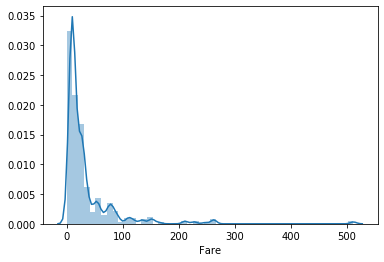

In [8]:
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(titanic['Fare'])

plt.show()

Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it. In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram. If you're interested in learning about how KDE works, you can read more on Wikipedia.

What you need to know for now is that the resulting line is a smoother version of the histogram, called a kernel density plot. Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission. When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.

Import seaborn as sns and matplotlib.pyplot as plt.
Use the seaborn.distplot() function to visualize the distribution of the "Age" column.
Display the plot using plt.show().

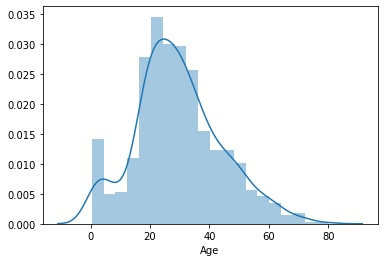

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(titanic['Age'])

plt.show()

While having both the histogram and the kernel density plot is useful when we want to explore the data, it can be overwhelming for someone who's trying to understand the distribution. **To generate just the kernel density plot, we use the seaborn.kdeplot() function:**

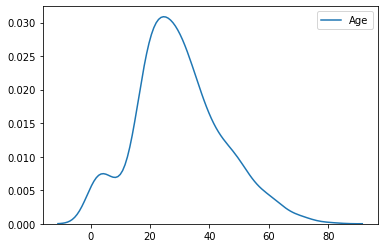

In [14]:
sns.kdeplot(titanic['Age'])

plt.show()

Generate a kernel density plot:
Using the values in the "Age" column
With the area under the curve shaded
Set the x-axis label to "Age" using pyplot.xlabel().

While the distribution of data is displayed in a smoother fashion, it's now more difficult to visually estimate the area under the curve using just the line chart. When we also had the histogram, the bars provided a way to understand and compare proportions visually.

To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color. **When calling the seaborn.kdeplot() function, we can shade the area under the line by setting the shade parameter to True.**

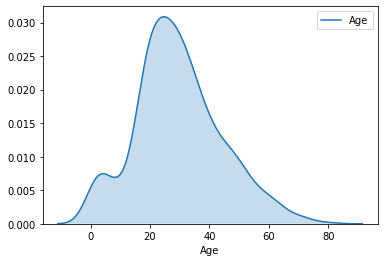

In [17]:
sns.kdeplot(titanic['Age'], shade = True)
plt.xlabel('Age')

plt.show()

From the plots in the previous step, you'll notice that seaborn:

Sets the x-axis label based on the column name passed through plt.xlabel() function
Sets the background color to a light gray color
Hides the x-axis and y-axis ticks
Displays the coordinate grid

In the last few missions, we explored some general aesthetics guidelines for plots. The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. **We can use the seaborn.set_style() function to change the default seaborn style sheet. Seaborn comes with a few style sheets:**

darkgrid: Coordinate grid displayed, dark background color
whitegrid: Coordinate grid displayed, white background color
dark: Coordinate grid hidden, dark background color
white: Coordinate grid hidden, white background color
ticks: Coordinate grid hidden, white background color, ticks visible

**By default, the seaborn style is set to "darkgrid":**

In [24]:
sns.set_style("darkgrid")

**To remove the axis spines for the top and right axes, we use the seaborn.despine() function:**

In [28]:
sns.despine()

<Figure size 432x288 with 0 Axes>

**By default, only the top and right axes will be despined,** or have their spines removed. **To despine the other two axes, we need to set the left and bottom parameters to True.**

Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
Generate a kernel density plot of the "Age" column, with the area under the curve shaded.
Set the x-axis label to "Age".
Despine all of the axes.

Text(0.5, 0, 'Age')

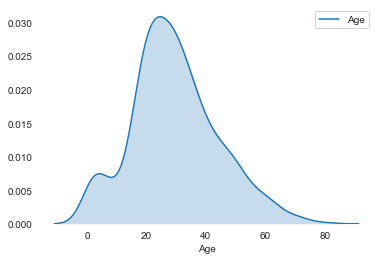

In [29]:
sns.set_style('white')
sns.kdeplot(titanic['Age'], shade = True)
sns.despine(left = True, bottom = True)
plt.xlabel('Age')

In the last few missions, we created a small multiple, which is a group of plots that have the same axis scales so the viewer can compare plots effectively. We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the "Age" column where Survived equalled 0 and the other would visualize the distribution of values in the "Age" column where Survived equalled 1.

Here's what those plots look like:

The code to generate the pair of plots, is short and sweet:

C:\Users\Keziah\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


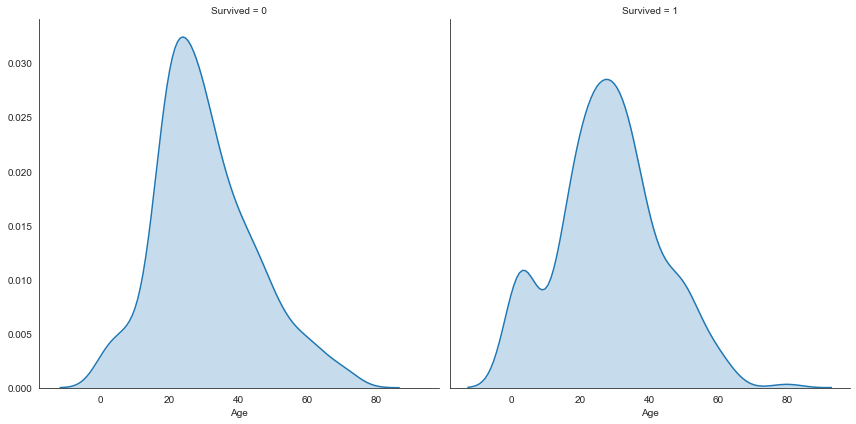

In [30]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col = 'Survived', size = 6)

# For each subset of values, generate a kernel density plot of the "Age" columns. #via MAP
g.map(sns.kdeplot, 'Age', shade = True)

Seaborn handled:

subsetting the data into rows where Survived is 0 and where Survived is 1
creating both Axes objects, ensuring the same axis scales
plotting both kernel density plots
Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The seaborn.FacetGrid object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from FacetGrid is another word for "subset". Setting the col parameter to "Survived" specifies a separate plot for each unique value in the Survived column. Setting the size parameter to 6 specifies a height of 6 inches for each plot.

Once we've created the grid, we use the FacetGrid.map() method to specify the plot we want for each unique value of Survived. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into FacetGrid.map() has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:

C:\Users\Keziah\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


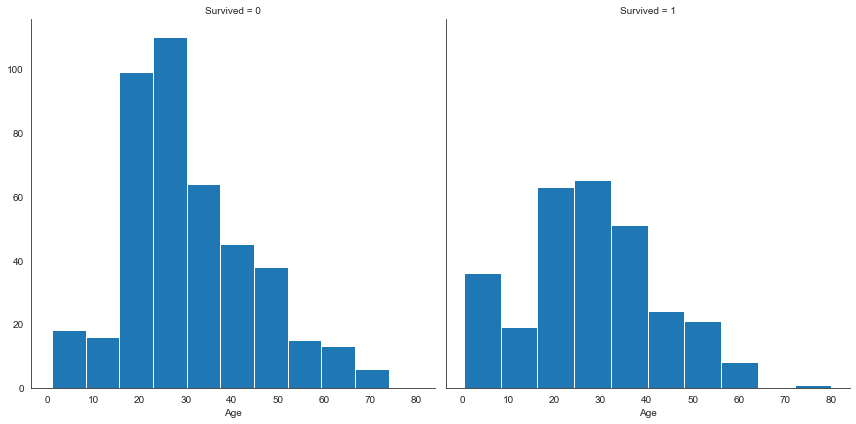

In [31]:
# Condition on unique values of the "Survived" column. 
g = sns.FacetGrid(titanic, col = 'Survived', size = 6)

# For each subset of values, generate a kernel density plot of the "Age" columns. # via MAP
g.map(plt.hist, 'Age') ## pass the plot into the first argument. plt.hist, sns.kdeplot

Use a FacetGrid instance to generate three plots on the same row:
One for each unique value of Pclass.
Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
Each plot should have a height of 6 inches.
Remove all of the spines using seaborn.despine().
Display the plots.

C:\Users\Keziah\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


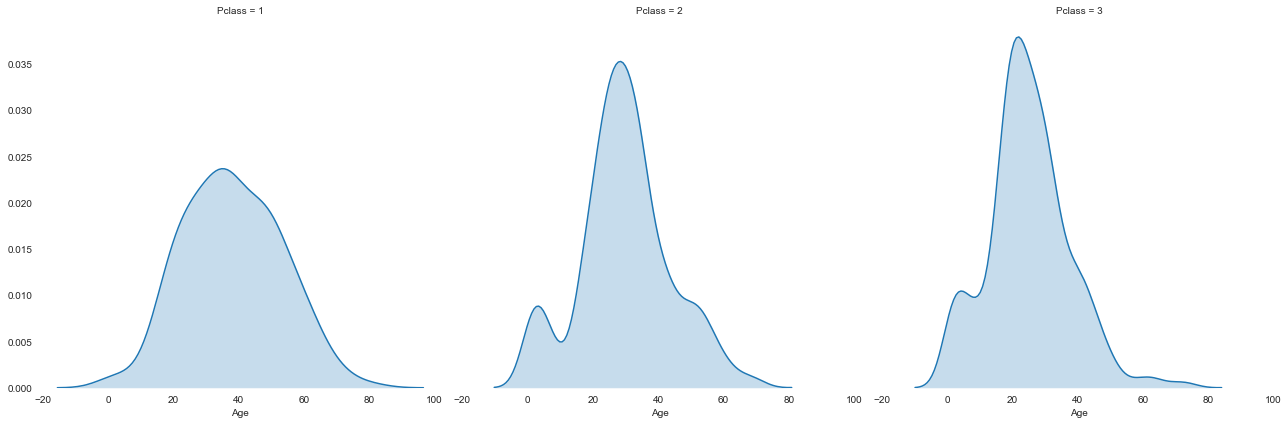

In [37]:
g = sns.FacetGrid(titanic, col = 'Pclass', size = 6)
g.map(sns.kdeplot, 'Age', shade = True)
sns.despine(bottom = True, left = True)

plt.show()

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a FacetGrid, we use the row parameter to specify the column in the dataframe we want used to subset across the rows in the grid. The best way to understand this is to see a working example.

The starter code subsets the dataframe on different combinations of unique values in both the Pclass and Survived columns. Try changing the conditions to see the resulting plots.

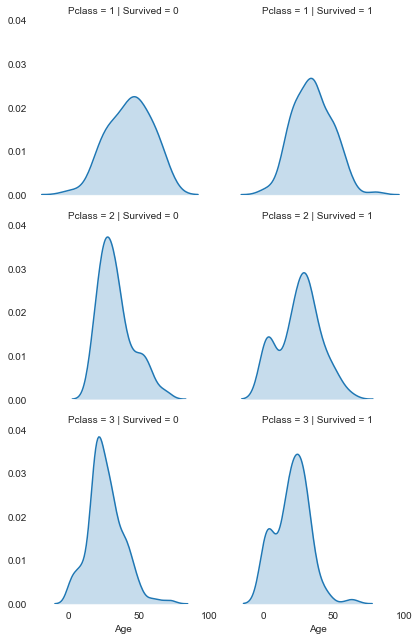

In [38]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the hue parameter to the column name from the dataframe.

Let's add a new condition to the grid of plots we generated in the last step and see what this grid of plots would look like.

Use a FacetGrid instance to generate a grid of plots using the following conditions:
The Survived column across the columns in the grid.
The Pclass column across the rows in the grid.
The Sex column using different hues.
Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
Each plot should have a height of 3 inches.
Remove all of the spines using seaborn.despine().
Display the plots.

[]

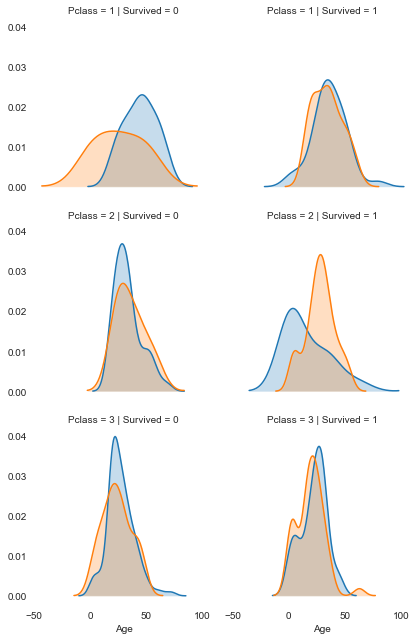

In [40]:
g = sns.FacetGrid(titanic, col = 'Survived', row = 'Pclass', hue = 'Sex', size = 3)
g.map(sns.kdeplot, 'Age', shade = True)
sns.despine(bottom = True, left = True)

plt.plot()

C:\Users\Keziah\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[]

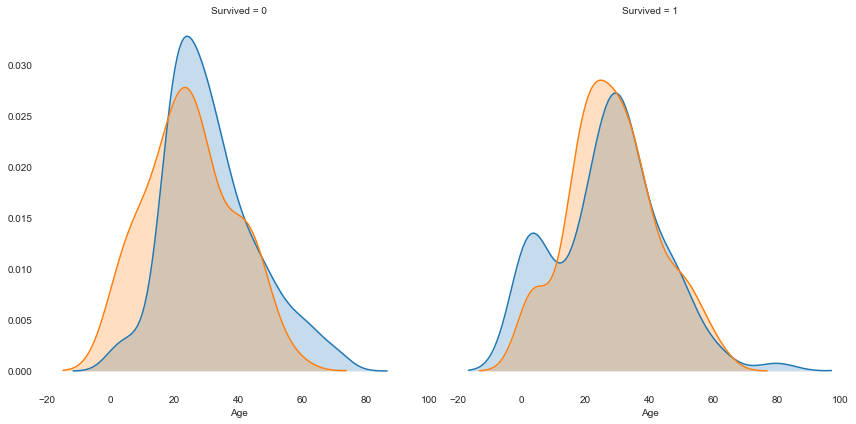

In [42]:
g = sns.FacetGrid(titanic, col = 'Survived', hue = 'Sex', size = 6)
g.map(sns.kdeplot, 'Age', shade = True)
sns.despine(bottom = True, left = True)

plt.plot()

Now that we're coloring plots, we need a **legend to keep track of which value each color represents**. As a challenge to you, we won't specify how exactly to generate a legend in seaborn. Instead, we encourage you to use the examples from the page on plotting using the FacetGrid instance.

Here's what we want the final grid to look like:

C:\Users\Keziah\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


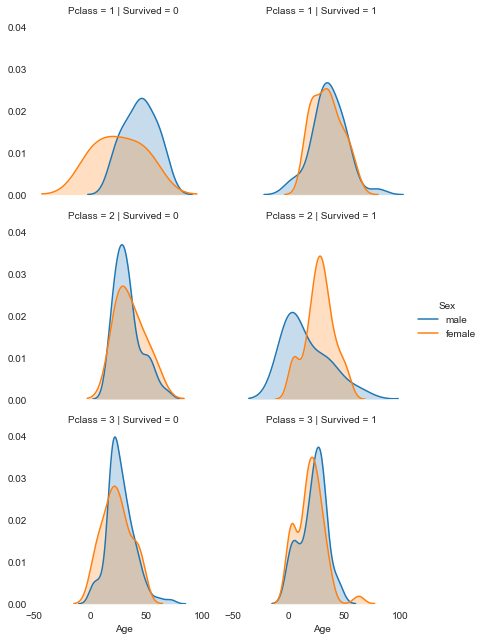

In [46]:
g = sns.FacetGrid(titanic, col = 'Survived', row = 'Pclass', hue = 'Sex', size = 3)
g.map(sns.kdeplot, 'Age', shade = True)
g.add_legend() # adding a legend
sns.despine(left = True, bottom = True)
plt.show()